# Prerequisites

- ECDLP
- Group theory
- p-adic numbers

# Theory

- We inspect curves of trace $t = 1 => |E(\mathbb{F}_p)| = p $
- Let $Q = kP$ be the ECDLP we want to solve for some $k$

*Idea*: Bring the curve into a group where we can solve the DLP. This time we use the p-adic numbers

## Setup

### P-adic numbers

- https://www.youtube.com/watch?v=vdjYiU6skgE&ab_channel=Rokker815 - Must watch
- https://en.wikipedia.org/wiki/P-adic_number

The $\mathbb{Q}_p$ = the p-adic field for some prime $p$ This field "completes" the rational numbers. 

*Intuition*: 
- For $\mathbb{Q}$ with $|\cdot|$ as absolute value we cannot reach the limits of some Cauchy sqeuences within $\mathbb{Q}$ => We have to extend to $\mathbb{R}$
    Ex: $\pi \not \in \mathbb{Q}$

For some prime $p$ every rational number can be expressed as:
- $r = p^n\frac a b$ where $n \in \mathbb{N} \ a,b \in \mathbb{Z}$ and are not multiples of $p$

The p-adic absolute value:
- $|r| = p^{-n}$

A p-adic number can be describe as an infinite series with the form:
- $x_{-m}p^{-m} + ... + x_0 + x_1p + ... x_np^n + ...$ with a unique representation if $x_i \in \mathbb{Z}/\mathbb{Z}_p$
- $x_i$ = p-adic digit

If $x_i =  0$ for $i < 0$ => we have the p-adic integers that can be represented as $\mathbb{Z}_p$


### Lifting

- https://en.wikipedia.org/wiki/Lift_(mathematics)
- https://mathworld.wolfram.com/Lift.html - simple explanation
- Given a morphism (map) $f: X → Y$ and a morphism $g: Z → Y$, a lift or lifting of $f$ to $Z$ is a morphism $h: X → Z$ such that $f = g∘h$. We say that f factors through $h$.
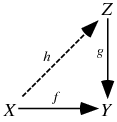

### Hensel's lemma

- https://en.wikipedia.org/wiki/Hensel%27s_lemma -> go to hensel lift
- https://brilliant.org/wiki/hensels-lemma/ 
- https://www.universiteitleiden.nl/binaries/content/assets/science/mi/scripties/bachwinter.pdf

For $f(x) ∈ ℤ[X]$ Let $r$ be a root of $f$ modulo $p^e$ ($f(r) \equiv 0 \ mod \ p^e$)and let $f'(r)$ be invertible modulo $p$ and let that inverse be $u$ such that $u(f'(r)) ≡ 1 \ mod \ p$.
- Let $r'= r - u(f'(r))$
- Then $r' \equiv r \ mod \ p^e$ and $f(r') \equiv 0 \ mod \ p^{e+1}$
- $r'$ is a lift of $r$ modulo $p^{e+1}$

*Intuition*: 
- Newton's method for p-adic numbers r' = r - 
- We can find a  root $r'$ in a higher modulo $p^{e+1}$ that is equivalent to the root $r$ mod $p$  

We will use this to lift the elliptic curve points from E($\mathbb{F}_p$) to E($\mathbb{Q}_p$)

## Smart attack

- https://link.springer.com/content/pdf/10.1007/s001459900052.pdf

Reduction modulo $p$ from $E(\mathbb{Q}_p)$ to $E(\mathbb{F}_p)$ is a group homomorphism => 
Let $E_1(\mathbb{Q}_p)$ be the kernel of this homomorphism => $E_1(\mathbb{Q}_p)$ contains all the points in$E_1(\mathbb{Q}_p)$ that reduce to the point at infinity in $E_1(\mathbb{F}_p)$.

**P-adic logarithm** from $E(\mathbb{Q}_p) \rightarrow \mathbb{Z}/p\mathbb{Z}_p$
- $\varphi_p(S) = - \cfrac {x(S)} {y(S)} \ mod \ p^2$

We are trying to find $k$ such that $Q = kP$ with $Q, P \in \mathbb{F}_p$

1. First we compute the lift of $P$ and $Q$ to $P'$ and $Q'$ on the same curve but over $\mathbb{Q}_p$ 
    - Let $x(P') = x(P)$
    - Use Hensel's lemma to compute $y \in \mathbb{Q}_p$
2. $Q = kP$ in $E(\mathbb{F}_p)$ => $Q' - kP'$ in $E(\mathbb{Q}_p)$ goes to $\mathcal{O}$ (point at infinity) => $Q' - kP' \in E_1(\mathbb{Q}_p)$ (in the kernel)
3. Since the order of $E(\mathbb{F}_p)$ is $p$ means that multiplying any element in $E(\mathbb{Q}_p)$ by $p$ maps it into $E_1(\mathbb{Q}_p)$
    - $\forall R \in E(\mathbb{Q}_p) => pR = \mathcal{O} \in E(\mathbb{F}_p)$
    - Multiplication by p maps $E(\mathbb{Q}_p)$ to $E_1(\mathbb{Q}_p)$ respectively the elements of $E_1(\mathbb{Q}_p)$ to $E_2(\mathbb{Q}_p)$.
    - $pQ' - k(pP')  \in E_2({\mathbb{Q}_p})$ with $pQ', pP' \in E_1(\mathbb{Q}_p)$
4. Apply our log 
    - $\varphi_p(pQ') - k\varphi_p(pP') \in p\mathbb{Z}_p$
    
5. $k = \cfrac {\varphi_p(pQ')} {\varphi_p(pP')} \ mod \ p$
    
**Note**:
- Randomize the lift to avoid the canonical case where $Q_p$ and $F_p$ are isomorhphic: $y^2=x^3+(p⋅a')x+(8856682+p⋅b')$, for some arbitrary $a'$ and $b'$
    

# Code

https://crypto.stackexchange.com/questions/70454/why-smarts-attack-doesnt-work-on-this-ecdlp

In [1]:
def smart_attack(P,Q,p):
    E = P.curve()
    #Randomize the lift to avoid the canonical case where Q_p and F_p are isomorphic
    Eqp = EllipticCurve(Qp(p, 2), [ ZZ(t) + randint(0,p)*p for t in E.a_invariants() ]) #
    
    P_Qps = Eqp.lift_x(ZZ(P.xy()[0]), all=True) #gets all lifted points with coordinate x
    
    #search for the point with the same y modulo p
    for P_Qp in P_Qps:
        if GF(p)(P_Qp.xy()[1]) == P.xy()[1]:
            break

    Q_Qps = Eqp.lift_x(ZZ(Q.xy()[0]), all=True)
    for Q_Qp in Q_Qps:
        if GF(p)(Q_Qp.xy()[1]) == Q.xy()[1]:
            break

    p_times_P = p*P_Qp
    p_times_Q = p*Q_Qp

    x_P,y_P = p_times_P.xy()
    x_Q,y_Q = p_times_Q.xy()

    phi_P = -(x_P/y_P)
    phi_Q = -(x_Q/y_Q)
    k = phi_Q/phi_P
    return ZZ(k)

In [2]:
# Curve params
p = 0xa15c4fb663a578d8b2496d3151a946119ee42695e18e13e90600192b1d0abdbb6f787f90c8d102ff88e284dd4526f5f6b6c980bf88f1d0490714b67e8a2a2b77
a = 0x5e009506fcc7eff573bc960d88638fe25e76a9b6c7caeea072a27dcd1fa46abb15b7b6210cf90caba982893ee2779669bac06e267013486b22ff3e24abae2d42
b = 0x2ce7d1ca4493b0977f088f6d30d9241f8048fdea112cc385b793bce953998caae680864a7d3aa437ea3ffd1441ca3fb352b0b710bb3f053e980e503be9a7fece

# Define curve
E = EllipticCurve(GF(p), [a, b])
P = E(3034712809375537908102988750113382444008758539448972750581525810900634243392172703684905257490982543775233630011707375189041302436945106395617312498769005 , 4986645098582616415690074082237817624424333339074969364527548107042876175480894132576399611027847402879885574130125050842710052291870268101817275410204850)
Q = E(4748198372895404866752111766626421927481971519483471383813044005699388317650395315193922226704604937454742608233124831870493636003725200307683939875286865 , 2421873309002279841021791369884483308051497215798017509805302041102468310636822060707350789776065212606890489706597369526562336256272258544226688832663757)

In [3]:
E.a_invariants()

(0,
 0,
 0,
 4923298572065486992549817192831990694521484100405815221208729152906589637309679506395496485479241352604070239922404839767350734501408775691888115823029570,
 2351894222324277225740358531607638866809626162614242940067864245019071482791248171844982397521930582454173681491594668678670733042074255903768208195714766)

In [4]:
m = smart_attack(P, Q, p)

In [6]:
m * P == Q

True

## Library (No sage required)

https://github.com/elliptic-shiho/ecpy

In [11]:
# !pip install git+https://github.com/elliptic-shiho/ecpy

In [12]:
from ecpy import FiniteField, EllipticCurve, SSSA_Attack

In [13]:
# Curve params
p = 0xa15c4fb663a578d8b2496d3151a946119ee42695e18e13e90600192b1d0abdbb6f787f90c8d102ff88e284dd4526f5f6b6c980bf88f1d0490714b67e8a2a2b77
a = 0x5e009506fcc7eff573bc960d88638fe25e76a9b6c7caeea072a27dcd1fa46abb15b7b6210cf90caba982893ee2779669bac06e267013486b22ff3e24abae2d42
b = 0x2ce7d1ca4493b0977f088f6d30d9241f8048fdea112cc385b793bce953998caae680864a7d3aa437ea3ffd1441ca3fb352b0b710bb3f053e980e503be9a7fece

F = FiniteField(p)
# Define curve
E = EllipticCurve(F, a, b)
P = E(3034712809375537908102988750113382444008758539448972750581525810900634243392172703684905257490982543775233630011707375189041302436945106395617312498769005 , 4986645098582616415690074082237817624424333339074969364527548107042876175480894132576399611027847402879885574130125050842710052291870268101817275410204850)
Q = E(4748198372895404866752111766626421927481971519483471383813044005699388317650395315193922226704604937454742608233124831870493636003725200307683939875286865 , 2421873309002279841021791369884483308051497215798017509805302041102468310636822060707350789776065212606890489706597369526562336256272258544226688832663757)

In [14]:
m = SSSA_Attack(F, E, P, Q)

In [15]:
P * m == Q

True

# Resources

- https://www.hpl.hp.com/techreports/97/HPL-97-128.pdf
- https://wstein.org/edu/2010/414/projects/novotney.pdf
- https://online.tugraz.at/tug_online/voe_main2.getvolltext?pCurrPk=51075
- http://www.monnerat.info/publications/anomalous.pdf
- https://www.math.brown.edu/~jhs/Presentations/WyomingEllipticCurve.pdf